<a href="https://colab.research.google.com/github/sanaeaba/how-to-execute-many-function-at-the-same-time/blob/master/MLP_and_DeepFM_Coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("cousera_For_mlp.csv")
df= df.drop(columns=['Unnamed: 0'])
course_encoder = LabelEncoder()
user_encoder = LabelEncoder()

df['course_id'] = course_encoder.fit_transform(df.course_id)
df['user_id'] = user_encoder.fit_transform(df.user_id)
df['Sentiment'] = course_encoder.fit_transform(df.Sentiment)
df['course_difficulty'] = user_encoder.fit_transform(df.course_difficulty)
df.head()

,course_id,user_id,rating,Sentiment,course_difficulty
0,289,8507,2,2,3
1,289,15643,2,1,3
2,289,3474,2,0,3
3,289,7221,3,2,3
4,289,8776,3,2,3


In [ ]:
X=df[['course_id', 'user_id','Sentiment','course_difficulty']]
y=df['rating']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [ ]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(16,8),
                    max_iter=50,
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
history_model= clf.fit(X_train,y_train)

Iteration 1, loss = 5.56996619
Iteration 2, loss = 1.03002509
Iteration 3, loss = 0.95121465
Iteration 4, loss = 0.92369624
Iteration 5, loss = 0.91220809
Iteration 6, loss = 0.90684818
Iteration 7, loss = 0.90427681
Iteration 8, loss = 0.90288920
Iteration 9, loss = 0.90215909
Iteration 10, loss = 0.90179152
Iteration 11, loss = 0.90157239
Iteration 12, loss = 0.90145122
Iteration 13, loss = 0.90137557
Iteration 14, loss = 0.90142094
Iteration 15, loss = 0.90137228
Iteration 16, loss = 0.90143668
Iteration 17, loss = 0.90135091
Iteration 18, loss = 0.90148729
Iteration 19, loss = 0.90136611
Iteration 20, loss = 0.90128395
Iteration 21, loss = 0.90162779
Iteration 22, loss = 0.90138167
Iteration 23, loss = 0.90134358
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [ ]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

In [ ]:
!pip install recmetrics
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 28.7 MB/s 
     |████████████████████████████████| 11.2 MB 41.6 MB/s 
     |████████████████████████████████| 13.2 MB 43.4 MB/s 
     |████████████████████████████████| 38.1 MB 56.1 MB/s 
     |████████████████████████████████| 381 kB 17.0 MB/s 
     |████████████████████████████████| 930 kB 43.3 MB/s 
     |████████████████████████████████| 297 kB 36.8 MB/s 
     |████████████████████████████████| 208 kB 21.1 MB/s 
     |████████████████████████████████| 232 kB 40.8 MB/s 
     |████████████████████████████████| 138 kB 53.2 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 48 kB 5.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 51 kB 5.6 MB/s 
     |████████████████████████████████| 4.0 MB 44.3 MB/s 
     |██████████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import recmetrics
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, ypred)
print("MAE: ", MAE)
print("MSE: ", recmetrics.mse(y_test,ypred))
print("RMSE: ", recmetrics.rmse(y_test,ypred))

MAE:  0.48189691892659375
MSE:  1.0756779781343178
RMSE:  1.0371489662214959


# **DeepFM**

In [ ]:
!pip install deepctr_torch
!pip install fast-ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from fast_ml.model_development import train_valid_test_split
from keras.layers import Embedding, Flatten, Input, merge, Dropout, Dense, BatchNormalization,concatenate,Multiply,Dot,Reshape
from keras.models import Model, Sequential

data = pd.read_csv('cousera_For_mlp.csv')
data

,Unnamed: 0,course_id,user_id,rating,Sentiment,course_difficulty
0,0,the-science-of-well-being,By Laura C,2,2,Mixed
1,1,the-science-of-well-being,By Tyson K,2,1,Mixed
2,2,the-science-of-well-being,By DULCEMARIA G S,2,0,Mixed
3,3,the-science-of-well-being,By Jonathan G,3,2,Mixed
4,4,the-science-of-well-being,By Liron S,3,2,Mixed
...,...,...,...,...,...,...
20117,20117,object-oriented-java,By Aman C 1,4,2,Beginner
20118,20118,object-oriented-java,By FPB,4,2,Beginner
20119,20119,object-oriented-java,By Alessandra G,4,0,Beginner
20120,20120,object-oriented-java,By Akash k,4,2,Beginner


In [ ]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
course_encoder = LabelEncoder()
user_encoder = LabelEncoder()
#Data encoder
data['course_id'] = course_encoder.fit_transform(data.course_id)
data['user_id'] = user_encoder.fit_transform(data.user_id)
data['Sentiment'] = user_encoder.fit_transform(data.Sentiment)
data['course_difficulty'] = course_encoder.fit_transform(data.course_difficulty)
data

,Unnamed: 0,course_id,user_id,rating,Sentiment,course_difficulty
0,0,289,8507,2,2,3
1,1,289,15643,2,1,3
2,2,289,3474,2,0,3
3,3,289,7221,3,2,3
4,4,289,8776,3,2,3
...,...,...,...,...,...,...
20117,20117,210,1060,4,2,1
20118,20118,210,4906,4,2,1
20119,20119,210,838,4,0,1
20120,20120,210,695,4,2,1


In [ ]:
num_users = len(data.user_id.unique())
num_courses = len(data.course_id.unique())
num_sentiment = len(data.Sentiment.unique())
num_course_difficulty = len(data.course_difficulty.unique())
#splitting data
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(data, target = 'rating', train_size=0.7, valid_size=0.1, test_size=0.2)

In [ ]:
user_id_input = Input(shape=[1], name='user')
item_id_input = Input(shape=[1], name='item')
sentiment_input = Input(shape=[1], name='sentiment')
course_difficulty_input = Input(shape=[1], name='course_difficulty')

# DeepFM Embeddings

embedding_size = 16
user_embedding = Embedding(output_dim=embedding_size, input_dim=num_users, name='user_embedding')(user_id_input)
item_embedding = Embedding(output_dim=embedding_size, input_dim=num_courses, name='item_embedding')(item_id_input)
sentiment_embedding = Embedding(output_dim=embedding_size, input_dim=num_sentiment, name='sentiment_embedding')(sentiment_input)
course_difficulty_embedding = Embedding(output_dim=embedding_size, input_dim=num_course_difficulty, name='course_difficulty_embedding')(course_difficulty_input)

user_vecs = Reshape([embedding_size])(user_embedding)
item_vecs = Reshape([embedding_size])(item_embedding)
sentiment_vecs = Reshape([embedding_size])(sentiment_embedding)
course_difficulty_vecs = Reshape([embedding_size])(course_difficulty_embedding)


input_vecs = concatenate([user_vecs, item_vecs,sentiment_vecs,course_difficulty_vecs])
x = Dense(128, activation='relu')(input_vecs)

# Final prediction
y = Dense(1)(x)

model = Model(inputs=[user_id_input, item_id_input,sentiment_input, course_difficulty_input], outputs=y)
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='mse')


In [ ]:
from keras.callbacks import ModelCheckpoint

mcheck = ModelCheckpoint('val_loss'  , monitor='val_loss', save_best_only=True)

history = model.fit([X_train.user_id, X_train.course_id, X_train.Sentiment, X_train.course_difficulty], y_train, epochs=20
                    , validation_data=([X_valid.user_id, X_valid.course_id, X_valid.Sentiment, X_valid.course_difficulty], y_valid)
                    , callbacks=[mcheck]
                    , shuffle=True)

Epoch 1/20
441/441 [==============================] - 4s 8ms/step - loss: 14.7353 - val_loss: 4.8185
Epoch 2/20
441/441 [==============================] - 3s 7ms/step - loss: 1.3878 - val_loss: 0.6547
Epoch 3/20
441/441 [==============================] - 3s 7ms/step - loss: 0.6433 - val_loss: 0.5998
Epoch 4/20
441/441 [==============================] - 3s 7ms/step - loss: 0.5871 - val_loss: 0.5703
Epoch 5/20
441/441 [==============================] - 4s 8ms/step - loss: 0.5383 - val_loss: 0.5506
Epoch 6/20
441/441 [==============================] - 3s 7ms/step - loss: 0.4825 - val_loss: 0.5467
Epoch 7/20
441/441 [==============================] - 2s 5ms/step - loss: 0.4129 - val_loss: 0.5572
Epoch 8/20
441/441 [==============================] - 2s 5ms/step - loss: 0.3333 - val_loss: 0.5876
Epoch 9/20
441/441 [==============================] - 2s 5ms/step - loss: 0.2575 - val_loss: 0.6400
Epoch 10/20
441/441 [==============================] - 2s 5ms/step - loss: 0.1949 - val_loss: 0.695

In [ ]:
y_hat = model.predict([X_test.user_id, X_test.course_id, X_test.Sentiment, X_test.course_difficulty])
y_true = y_test

In [ ]:
!pip install recmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import mean_absolute_error
import recmetrics

MAE = mean_absolute_error(y_true, y_hat)
print("MAE: ", MAE)
print("MSE: ", recmetrics.mse(y_true,y_hat))
print("RMSE: ", recmetrics.rmse(y_true,y_hat))

MAE:  0.7424235974113393
MSE:  0.9166959823759019
RMSE:  0.9574424172637757


In [ ]:
!pip uninstall matplotlib
!pip install -U matplotlib

Found existing installation: matplotlib 3.5.2
Uninstalling matplotlib-3.5.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
ERROR: pip's dependency resolver does not currently take in

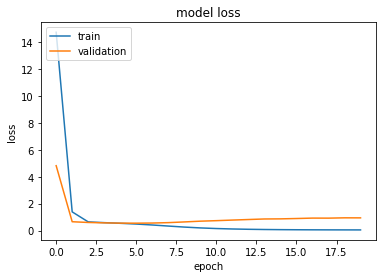

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()